In [ ]:
mfcc로지스틱회귀모형(선형)의 1단계인 남성, 남성 샘플 각 100개씩 학습하여 테스트 (누군지 맞히는 것, 각자 50개씩) 맞추는 코드 작성.
성공률 : 1.0
맞힌 갯수 : 100/100

In [ ]:
아래는 mfcc를 시각화한 그래프를 보이기 위함입니다.

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -4.5776367e-04
 -1.8310547e-04 -9.1552734e-05] (36855,)


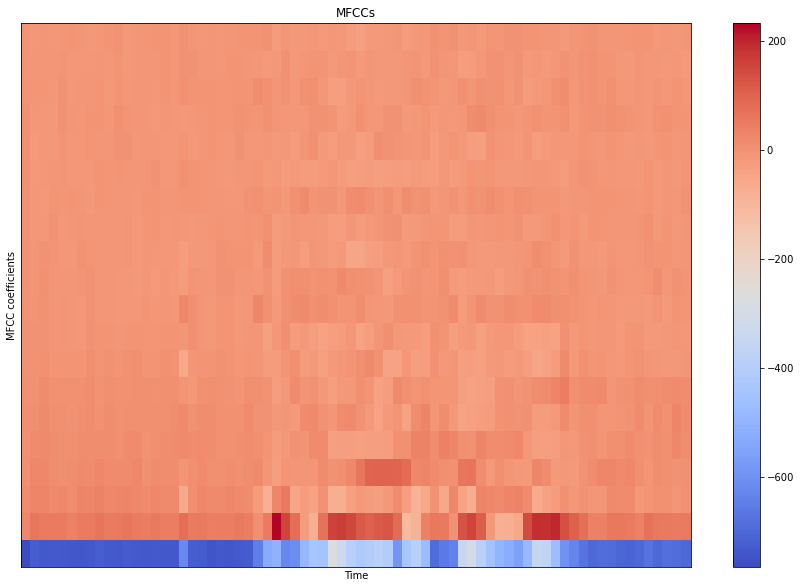

In [1]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

#아래 두 라이브러리는 sr 추출에 필요
import os
import wave

file=r"C:\Users\J\Desktop\\voice1.wav" #파일 불러오기

#아래는 sr(sampling rate, 샘플링 레이트) 추출
#생플링 레이트란 단위시간(주로 초)당 샘플링 횟수, 초당 샘플의 빈도. sr=16000Hz는 초당 16000개로 등분하여 샘플을 추출한다는 뜻.

for file_name in os.listdir("C:/Users/J/Desktop/voiceData/voicefile/voicefile/voice1"):
    with wave.open("C:/Users/J/Desktop/voiceData/voicefile/voicefile/voice1/voice1.wav", "rb") as wave_file:
        frame_rate = wave_file.getframerate()
        sr = frame_rate

sig, sr = librosa.load(file, sr) #추출한 sr을 적용해준다

FIG_SIZE=(15,10) #plot 크기
print(sig,sig.shape) #wav 파일의 벡터 개수를 알 수 있음(괄호 안 숫자)

hop_length = 512  # 전체 frame 수 / hop_length는 음성의 magnitude를 얼만큼 겹친 상태로 잘라서 칸으로 보여줄 것인가. n_fft의 영향받음.
# magnitude : 파동의 높이(peak의 높이), 해당 주파수의 파형의 세기
n_fft = 512 # frame 하나당 sample 수. 음성은 default = 512. 음성을 얼마의 크기로 자르게 될지 결정. n_fft와 모형의 정확도 관계성을 살피기 위해 변경해가며 실험할 것.

#extract 13 MFCCs
MFCCs = librosa.feature.mfcc(sig, sr,hop_length=hop_length, n_fft=n_fft, n_mfcc=20)
#n_mfcc란 mfcc 계수. 보통 20~25, 일반적으로 20. 상황에 따라 변동.

#display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
#coefficient : 계수
plt.colorbar()
plt.title("MFCCs")

#show plots
plt.show()


In [ ]:
아래는 logistic regression classifier를 사용해 분류하는 것입니다.
트레이닝 데이터 200개, 테스트 데이터 100개
데이터셋(wav파일)으로부터 mfcc를 추출해내 차원을 20으로 두고 평균값을 구해 배열의
형태로 두는 것까지는 성공하였지만, 모델 적용 과정에서 배열 차원 오류로 인해 
완성되지는 않은 상태입니다.
(성공함)

In [2]:
#train final
from imutils import paths
import os
import librosa
import numpy as np

def getMFCC(filepath):
    y, sr = librosa.load(filepath)
    mfcc=librosa.feature.mfcc(y=y, sr=16000, n_mfcc=20)
    return mfcc


folder = ('C:/Users/J/Desktop/X_train')
files = paths.list_files(folder)

j=0
for i in files:
    if j==0:
        mfcc=getMFCC(i)
        mfcc=np.mean(mfcc, axis=1)
        X_train=np.array([mfcc])
        j=j+1
    else:
        mfcc=getMFCC(i)
        mfcc=np.mean(mfcc, axis=1)
        X_train = np.append(X_train, [mfcc], axis=0)


Y_train=np.array([1])

for j in range (0,99):
    Y_train=np.append(Y_train, [1],axis=0)
    
for j in range (0,100):
    Y_train=np.append(Y_train,[0],axis=0)

        
print(X_train)
print(X_train.shape)
print(X_train.size)
print(X_train.ndim)
print(Y_train.shape) 

[[-377.214        99.431015    -10.501879   ...   -3.483969
    -5.4712124    -3.4806004 ]
 [-379.52893     107.74267      12.46107    ...   -8.357255
    -8.841305      0.42802945]
 [-412.39905      97.28981     -22.560478   ...   -3.0607436
    -5.3249974    -3.8749504 ]
 ...
 [-332.9277      128.71512     -34.99387    ...  -10.442289
    -7.05258       3.5595987 ]
 [-349.8763      130.91275     -23.221342   ...   -9.563682
    -6.903944      2.092808  ]
 [-321.75912     138.20381     -28.645212   ...   -5.531375
    -5.643883     -5.5729303 ]]
(200, 20)
4000
2
(200,)


In [3]:
#test final
from imutils import paths
import os
import librosa
import numpy as np

def getMFCC(filepath):
    y, sr = librosa.load(filepath)
    mfcc=librosa.feature.mfcc(y=y, sr=16000, n_mfcc=20)
    return mfcc


folder = ('C:/Users/J/Desktop/X_test')
files = paths.list_files(folder)

j=0
for i in files:
    if j==0:
        mfcc=getMFCC(i)
        mfcc=np.mean(mfcc, axis=1)
        X_test=np.array([mfcc])
        j=j+1
    else:
        mfcc=getMFCC(i)
        mfcc=np.mean(mfcc, axis=1)
        X_test = np.append(X_test, [mfcc], axis=0)

        

Y_test=np.array([1])

for j in range (0,49):
    Y_test=np.append(Y_test, [1],axis=0)
    
for j in range (0,50):
    Y_test=np.append(Y_test,[0],axis=0)

        
print(X_test)
print(X_test.shape)
print(X_test.size)
print(X_test.ndim)
print(Y_test.shape)

[[-415.6559     102.1274     -16.366665  ...   -3.855424    -7.5118284
    -2.5794702]
 [-427.85425    101.63358    -15.61338   ...   -3.5714467   -5.772785
    -3.688937 ]
 [-422.83914     91.2591     -21.701029  ...   -2.7305717   -6.2181253
    -8.261889 ]
 ...
 [-404.02975    114.50648    -14.90785   ...   -8.089381    -6.0215526
    -3.1800544]
 [-376.3712     125.9638     -18.81046   ...   -9.126996    -8.237053
     1.1444468]
 [-393.59848    120.050545   -18.048943  ...   -9.342834    -2.7308817
    -1.8048611]]
(100, 20)
2000
2
(100,)


In [10]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(max_iter=500)
logreg.fit(X_train,Y_train)
y_test_estimated = logreg.predict(X_test)
 
print (y_test_estimated)

print(logreg.score(X_train, Y_train))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1.0
